# Lab 2-1: Economic Dispatch of Generators in a Power System
## 43026 Energy Economics, Optimisation and Policy
### Autumn 2025
### Linear Programming Approach using Python

---

## Lab Overview

This Python-based Jupyter Notebook helps you to understand **economic dispatch**. Our objective is to find the best way to distribute power generation among multiple generators at the **lowest cost** while ensuring that the **total power demand is met**.

We use **Linear Programming (LP)**, a mathematical optimization method to **minimize costs while satisfying constraints**.

### In this Lab, We Will Learn:
- How to **represent generator costs** in a simple form.
- How to **set up constraints** to ensure demand is met.
- How to **use Python’s `scipy.optimize.linprog` function** to solve the problem.

---
## Python Environment Setup by Installing Required Python Libraries

Before running the code, ensure you have the necessary packages installed.

```python
!pip install numpy
!pip install -U matplotlib
!pip install scipy

In [1]:
!pip install numpy
!pip install -U matplotlib
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


---

## Step 1: What is Economic Dispatch?

**Economic dispatch** is the process of allocating power generation among available generators in a power system such that the **total operating cost** is minimized while meeting the required demand.

Let's assume we have **3 power generators**. Each generator has:
1. **A fixed startup cost** (cost when turned on).
2. **A fuel cost** that increases as it produces more power.
3. **A minimum and maximum power output limit**.

**Goal:** Find the **best power distribution** among these generators to **minimize cost** while ensuring that the **total demand is met**.



---

## Step 2: Define Generator Data

Each generator has:
- **A fixed startup cost** (in dollars).
- **A fuel cost per MW** (how much it costs to produce 1 MW of power).
- **A minimum and maximum power limit**.

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Number of generators
num_generators = 3

# Fixed startup cost ($) for each generator (not used in optimization)
startup_cost = np.array([100, 120, 90])

# Cost per MW ($/MW) for each generator
fuel_cost = np.array([10, 12, 9])

# Minimum and maximum power each generator can produce (MW)
P_min = np.array([50, 60, 40])
P_max = np.array([200, 180, 150])

# Total power demand (MW)
P_demand = 400

print("Generator data is set up.")
```


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Number of generators
num_generators = 3

# Fixed startup cost ($) for each generator (not used in optimization)
startup_cost = np.array([100, 120, 90])

# Cost per MW ($/MW) for each generator
fuel_cost = np.array([10, 12, 9])

# Minimum and maximum power each generator can produce (MW)
P_min = np.array([50, 60, 40])
P_max = np.array([200, 180, 150])

# Total power demand (MW)
P_demand = 400

print("Generator data is set up.")

Generator data is set up.



---

## Step 3: Define the Power Balance Constraint

To keep the **power grid stable**, the **total power generated** must exactly match the **total demand**:

$$ \sum_{i=1}^{n} P_i = P_{\text{demand}} $$

```python
# Constraint: Total power must equal demand
A_eq = np.ones((1, num_generators))  # Sum of power should be equal to demand
b_eq = np.array([P_demand])
print("Power balance constraint is defined.")
```


In [3]:
# Constraint: Total power must equal demand
A_eq = np.ones((1, num_generators))  # Ensures sum of power outputs equals demand
b_eq = np.array([P_demand])  # Total power demand constraint

print("Power balance constraint is defined.")
print("A_eq matrix:", A_eq)
print("b_eq vector:", b_eq)

Power balance constraint is defined.
A_eq matrix: [[1. 1. 1.]]
b_eq vector: [400]



---

## Step 4: Define the Cost Function

The cost we want to **minimize** is:

$$ \min \sum_{i=1}^{n} c_i P_i $$

where:
- $ c_i $ is the **fuel cost per MW** for generator $ i $.
- $ P_i $ is the **power produced** by generator $ i $.

Since we **ignore startup costs** at this step, we **only consider the fuel cost per MW**.

```python
# Cost function: Minimize total fuel cost
f = fuel_cost
print("Objective function (cost minimization) is defined.")
```


In [4]:
# Cost function: Minimize total fuel cost
f = fuel_cost
print("Objective function (cost minimization) is defined.")
print("Cost function coefficients:", f)

Objective function (cost minimization) is defined.
Cost function coefficients: [10 12  9]



---

## Step 5: Solve Using Linear Programming

We use **Python’s Linear Programming (`scipy.optimize.linprog`)** function.

The function takes:
- **f** → **Cost function**
- **Constraints (A_eq, b_eq)** → **Power balance condition**
- **Bounds (lb, ub)** → **Minimum and maximum power for each generator**

### **Understanding the `linprog` function**
The `scipy.optimize.linprog` function solves **linear programming problems** of the form:

$$ \min c^T x $$

subject to:
- **Equality constraint**: $ Ax = b $
- **Bounds**: $ l \leq x \leq u $

We solve using the **"highs"** method, which is:
- **Fast and efficient** for large problems.
- **Alternative solvers**: `"interior-point"`, `"revised simplex"`, `"simplex"`.


```python
# Set generator limits (bounds)
bounds = list(zip(P_min, P_max))

# Solve using Linear Programming
result = linprog(f, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")

# Extract results
P_opt = result.x
total_cost = result.fun

print("Optimal power dispatch solution:")
print(P_opt)
print(f"Total Cost: ${total_cost:.2f}")
```


In [5]:
# Set generator limits (bounds)
bounds = list(zip(P_min, P_max))

# Solve using Linear Programming
result = linprog(f, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")

# Extract results
P_opt = result.x
total_cost = result.fun

print("Optimal power dispatch solution:")
print(P_opt)
print(f"Total Cost: ${total_cost:.2f}")

Optimal power dispatch solution:
[190.  60. 150.]
Total Cost: $3970.00



---

## Step 6: Visualizing the Results

To better understand the results, we plot the **optimal power distribution** among the generators.

```python
# Plot the power allocation for each generator
plt.figure(figsize=(8, 5))
plt.bar(range(1, num_generators + 1), P_opt, color='b')
plt.xlabel("Generator Index")
plt.ylabel("Power Output (MW)")
plt.title("Optimal Power Dispatch")
plt.grid(True)
plt.show()
```


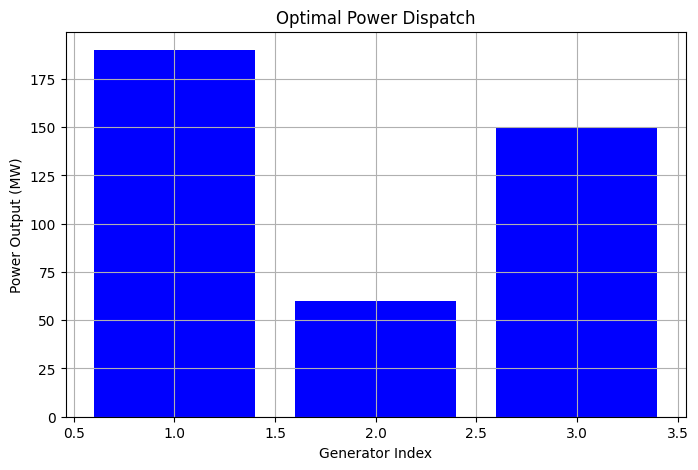

In [6]:
# Plot the power allocation for each generator
plt.figure(figsize=(8, 5))
plt.bar(range(1, num_generators + 1), P_opt, color='b')
plt.xlabel("Generator Index")
plt.ylabel("Power Output (MW)")
plt.title("Optimal Power Dispatch")
plt.grid(True)
plt.show()


---

## Step 7: More Realistic Case (7 Generators)

Now, let's **extend the problem** to **7 generators** with similar logic.

Note that **new generators have different costs and power limits**.

**Updated Conditions:**
- The **total power demand increases** to **800 MW**.

```python
# Number of generators (expanded case)
num_generators = 7

# Updated generator parameters
startup_cost = np.array([100, 120, 90, 150, 110, 130, 95])
fuel_cost = np.array([10, 12, 9, 14, 11, 13, 8])

# Power limits for each generator (MW)
P_min = np.array([50, 60, 40, 70, 55, 65, 45])
P_max = np.array([200, 180, 150, 220, 190, 210, 160])

# Load demand (MW)
P_demand = 800

# Define new constraints
A_eq = np.ones((1, num_generators))  # Ensures sum of power outputs equals demand
b_eq = np.array([P_demand])  # Total power demand constraint
```


In [7]:
# Number of generators (expanded case)
num_generators = 7

# Updated generator parameters
startup_cost = np.array([100, 120, 90, 150, 110, 130, 95])
fuel_cost = np.array([10, 12, 9, 14, 11, 13, 8])

# Power limits for each generator (MW)
P_min = np.array([50, 60, 40, 70, 55, 65, 45])
P_max = np.array([200, 180, 150, 220, 190, 210, 160])

# Load demand (MW)
P_demand = 800

# Define new constraints
A_eq = np.ones((1, num_generators))  # Ensures sum of power outputs equals demand
b_eq = np.array([P_demand])  # Total power demand constraint


---

## Step 8: Solve for 7 Generators

```python
# Set generator limits (bounds)
bounds = list(zip(P_min, P_max))

# Solve using Linear Programming
result = linprog(fuel_cost, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")

# Extract results
P_opt = result.x
total_cost = result.fun

print("Optimal Power Dispatch for 7 Generators:")
print(P_opt)
print(f"Total Cost: ${total_cost:.2f}")
```


In [8]:
# Set generator limits (bounds)
bounds = list(zip(P_min, P_max))

# Solve using Linear Programming
result = linprog(fuel_cost, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")

# Extract results
P_opt = result.x
total_cost = result.fun

print("Optimal Power Dispatch for 7 Generators:")
print(P_opt)
print(f"Total Cost: ${total_cost:.2f}")

Optimal Power Dispatch for 7 Generators:
[200.  60. 150.  70.  95.  65. 160.]
Total Cost: $8220.00



---

## Step 9: Visualizing the 7-Generator Case

```python
# Visualization: Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(range(1, num_generators + 1), P_opt, color='b')
plt.xlabel("Generator Number")
plt.ylabel("Power Output (MW)")
plt.title("Optimal Power Dispatch for 7 Generators")
plt.grid(True)
plt.xticks(range(1, num_generators + 1))
plt.ylim([0, max(P_max) + 20])  # Adjust y-axis limit
plt.show()
```


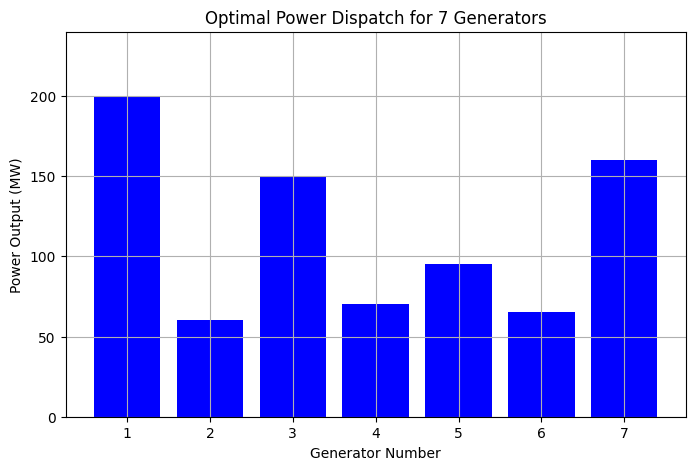

In [9]:
# Visualization: Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(range(1, num_generators + 1), P_opt, color='b')
plt.xlabel("Generator Number")
plt.ylabel("Power Output (MW)")
plt.title("Optimal Power Dispatch for 7 Generators")
plt.grid(True)
plt.xticks(range(1, num_generators + 1))
plt.ylim([0, max(P_max) + 20])  # Adjust y-axis limit
plt.show()


---

## Step 10: Summary

- We formulated an **economic dispatch problem** using **linear programming**.
- We implemented **constraints** to balance power demand.
- We optimized the **power distribution** using **Python’s `scipy.optimize.linprog`** function.
- We **visualized** the power allocation using **bar charts**.

---

### **Mathematical Summary**

1. **Total Power Balance Constraint**:

   $$ \sum_{i=1}^{n} P_i = P_{\text{demand}} $$

2. **Cost Function**:

   $$ \min \sum_{i=1}^{n} c_i P_i $$

3. **Bound Constraints**:

   $$ P_{\min, i} \leq P_i \leq P_{\max, i} $$